## MNIST dataset
* The MNIST database was constructed from NIST's Special Database 3 and Special Database 1 which contain binary images of handwritten digits.
> In this example we are going to create a Neural Network that recognizes hand written digits from MNIST dataset

### Imports

In [4]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import datasets

> Checking the `datasets` that we have in keras

In [6]:
print(dir(datasets))

['__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '_sys', 'boston_housing', 'cifar10', 'cifar100', 'fashion_mnist', 'imdb', 'mnist', 'reuters']


In [3]:
tf.__version__

'2.4.1'

### Data preparation
`MNIST` dataset contain images of digits from `0` to `9` which are `28x28`

In [9]:
mnist = datasets.mnist.load_data()

> The `MNIST` object we just created contains 2 tuples, the first one is for train dataset and the otherone is for testing. In each tuple there are 2 thing features and labels. Features is just an `ndarray` of pixels and labels are just numbers from 0 to 9.

In [22]:
(X_train, y_train), (X_test, y_test) = mnist
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

> We have `60000` images which are `28x28` and `60000` labels for each in the train dataset. We also have `10000` images with the same dimension in the test set.

In [25]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

> These images seems to be shuffled already. Let's visualise the first image in the train data set.

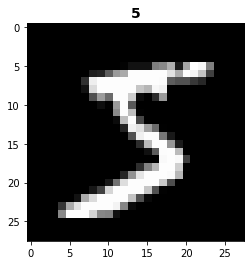

In [33]:
plt.imshow(X_train[0], cmap='gray')
plt.title(y_train[0], fontsize=14, fontweight="bold")
plt.show()

> This is a `5` indeed.

### Data Scaling
It's generally a good idea to "normalize" your data. This typically involves scaling the data to be between 0 and 1, or maybe -1 and positive 1. In our case, each "pixel" is a feature, and each feature currently ranges from 0 to 255. Not quite 0 to 1. Let's change that with a handy utility function:

In [38]:
X_train = keras.utils.normalize(X_train, axis=1)
X_test = keras.utils.normalize(X_test, axis=1)

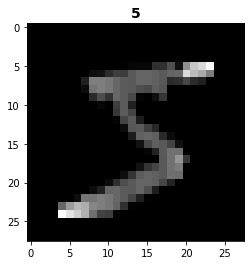

In [39]:
plt.imshow(X_train[0], cmap='gray')
plt.title(y_train[0], fontsize=14, fontweight="bold")
plt.show()

> We still getting the same `5` nothing has changed so far, we just `normalize` pixels to be between 0 and 1.

> Let's check if the data is balanced or not.

In [42]:
numbers = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0}
for i in y_train:
    numbers[i] +=1
numbers

{0: 5923,
 1: 6742,
 2: 5958,
 3: 6131,
 4: 5842,
 5: 5421,
 6: 5918,
 7: 6265,
 8: 5851,
 9: 5949}

> The data is pretty cool and there's no much of a difference between the frequences of each number.

### Model Creation
> This is very important, Our image is a `28x28` which is multi-d array so we need to flatten the dimension of our image. There are many ways we can use `numpy` anything but we are going to use the keras layer `Flatten()` to flatten our image input for us. So this means our first layer in the Nueral Network will be the `Flatten` layer.

In [44]:
model = keras.Sequential([
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax'),
])

In [46]:
model.compile(
    optimizer= keras.optimizers.Adam(learning_rate=1e-3,),
    loss = keras.losses.SparseCategoricalCrossentropy(),
    metrics=["accuracy"]
)

In [48]:
EPOCHS = 10
BATCH_SIZE = 8
model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE)

Epoch 1/10
7500/7500 [==============================] - 19s 2ms/step - loss: 0.4123 - accuracy: 0.8718
Epoch 2/10
7500/7500 [==============================] - 15s 2ms/step - loss: 0.1207 - accuracy: 0.9635
Epoch 3/10
7500/7500 [==============================] - 15s 2ms/step - loss: 0.0850 - accuracy: 0.9734
Epoch 4/10
7500/7500 [==============================] - 17s 2ms/step - loss: 0.0712 - accuracy: 0.9783
Epoch 5/10
7500/7500 [==============================] - 16s 2ms/step - loss: 0.0539 - accuracy: 0.9823
Epoch 6/10
7500/7500 [==============================] - 16s 2ms/step - loss: 0.0473 - accuracy: 0.9858
Epoch 7/10
7500/7500 [==============================] - 17s 2ms/step - loss: 0.0393 - accuracy: 0.9872
Epoch 8/10
7500/7500 [==============================] - 20s 3ms/step - loss: 0.0340 - accuracy: 0.9894
Epoch 9/10
7500/7500 [==============================] - 17s 2ms/step - loss: 0.0327 - accuracy: 0.9890
Epoch 10/10
7500/7500 [==============================] - 16s 2ms/step - l

> The `99%` accurate on the train images. and we have a loss of `0.03` which is close to 0. This means our model is cool on the train sample.

### Model Summary

In [49]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (8, 784)                  0         
_________________________________________________________________
dense (Dense)                (8, 64)                   50240     
_________________________________________________________________
dense_1 (Dense)              (8, 64)                   4160      
_________________________________________________________________
dense_2 (Dense)              (8, 64)                   4160      
_________________________________________________________________
dense_3 (Dense)              (8, 10)                   650       
Total params: 59,210
Trainable params: 59,210
Non-trainable params: 0
_________________________________________________________________


### Evaluating

In [51]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1254 - accuracy: 0.9746


[0.12540856003761292, 0.9746000170707703]

> The `97%` accurate on the test images. and we have a loss of `0.13` which is close to 0. This means our model is cool on the test sample. And we are not `overfitting` because the accuracy from the train and test are close to each other.

### Making Prediction

In [64]:
predictions = model.predict((X_test[6:7]))
predictions 

array([[8.0563574e-15, 2.3088481e-13, 1.9216269e-09, 6.9906822e-14,
        9.9999762e-01, 6.8072867e-14, 6.8319746e-14, 1.1283490e-08,
        3.8955368e-09, 2.4145525e-06]], dtype=float32)

In [65]:
np.round(predictions) ## The model is saying it's a 4

array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

Text(0.5, 1.0, '4')

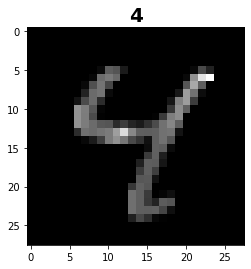

In [68]:
plt.imshow(X_test[6], cmap='gray')
plt.title(y_test[6], fontsize=20, fontweight='bold')

### Saving the Model
> To save our model we call the `model.save(__path__)` method.

In [52]:
model.save('models/hand_written_digits')
print("Model Saved!!")

INFO:tensorflow:Assets written to: models/hand_written_digits\assets
Model Saved!!


### Loading the model

In [53]:
clf = keras.models.load_model('models/hand_written_digits')

In [71]:
predictions = clf.predict((X_test[6:7]))
np.argmax(predictions) 

4

> Awesome!! We have trained our model that recognizes images.